In [ ]:
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


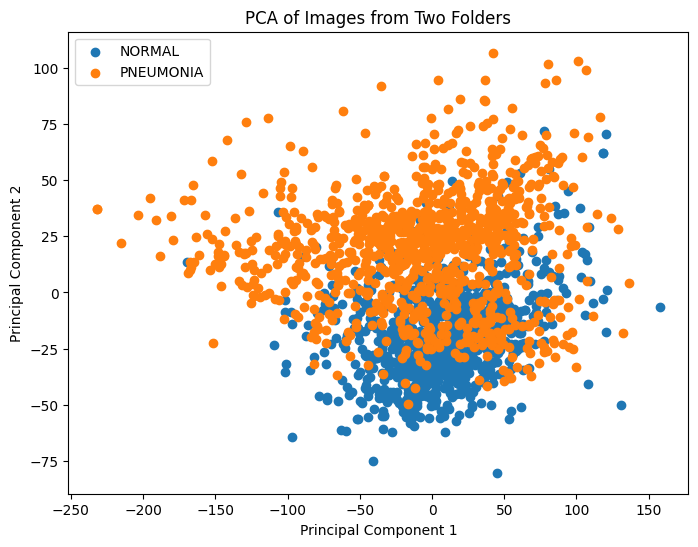

In [ ]:
# Folder paths containing images
folder_path_NORMAL = '/content/drive/MyDrive/HW3_dataset/train/NORMAL'
folder_path_PNEUMONIA = '/content/drive/MyDrive/HW3_dataset/train/PNEUMONIA' # Corrected folder path

# Load images, resize and flatten
images = []
labels = []
for folder_path in [folder_path_NORMAL, folder_path_PNEUMONIA]:
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.png', '.jpeg')):
            img = Image.open(os.path.join(folder_path, filename)).convert('L')
            img = img.resize((100, 100))
            img_array = np.array(img)
            flattened_img = img_array.flatten()
            images.append(flattened_img)
            labels.append(os.path.basename(folder_path)) # Use folder name as label

images = np.array(images)

# Standardize the data
scaler = StandardScaler()
scaled_images = scaler.fit_transform(images)

# Apply PCA with 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_images)

# Visualize the data
plt.figure(figsize=(8, 6))
for label in np.unique(labels):
    indices = [i for i, l in enumerate(labels) if l == label]
    plt.scatter(principal_components[indices, 0], principal_components[indices, 1], label=label)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Images from Two Folders')
plt.legend()
plt.show()